# Анализ партий на Lichess

In [3]:
import requests
import io
import chess.pgn
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
username = 'AndrewSalmin'

In [5]:
def download_pgn_games(username):
    url = f'https://lichess.org/api/games/user/{username}'
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.text
    else:
        return None

pgn_games_string = download_pgn_games(username)

assert pgn_games_string != None and pgn_games_string != '', 'Пользователь с указанным логином не найден или пользователь не сыграл ни одной партии'

In [6]:
pgn_games = io.StringIO(pgn_games_string)
games = []
while True:
    game = chess.pgn.read_game(pgn_games)
    if game is None:
        break
    games.append(game)

print(f'Прочитано партий: {len(games)}')

Прочитано партий: 1233


## Анализ хедеров

### Топ-10 событий по числу партий

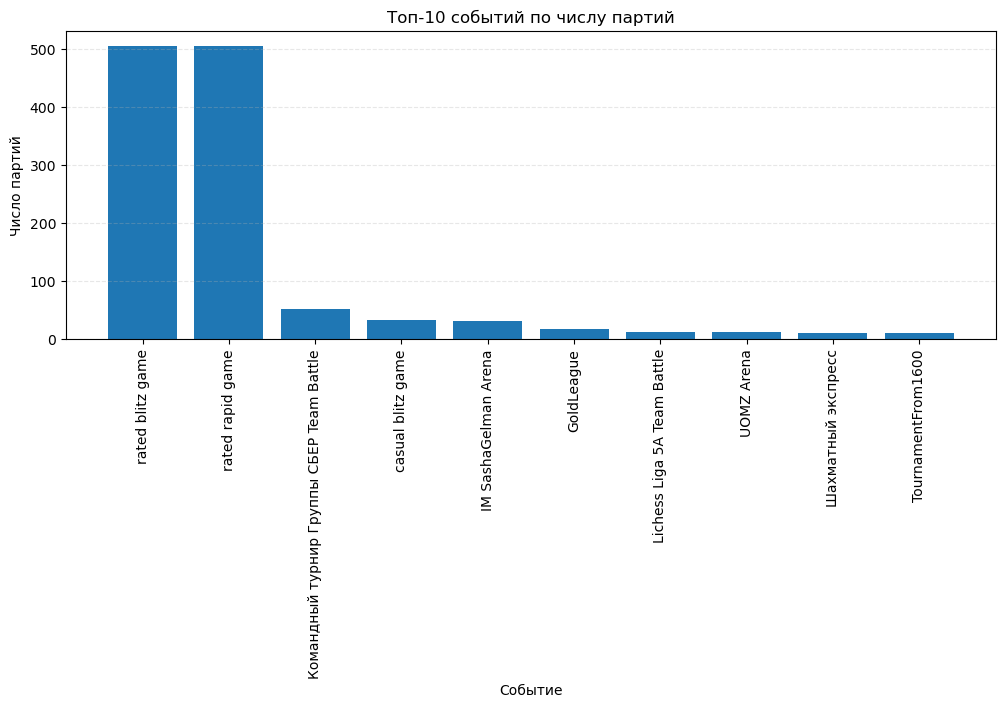

In [9]:
events = []
for game in games:
    events.append(game.headers['Event'])

assert len(events) == len(games)

most_frequent_events_counter = dict(Counter(events).most_common(10))

plt.figure(figsize=(12, 4))
plt.bar(most_frequent_events_counter.keys(), most_frequent_events_counter.values())
plt.title('Топ-10 событий по числу партий')
plt.xlabel('Событие')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Топ-10 соперников по числу партий

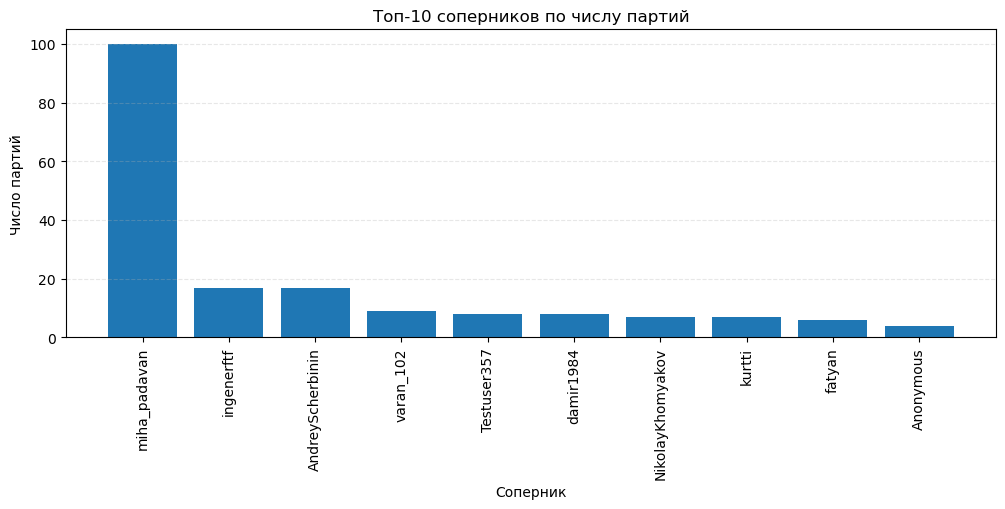

In [11]:
opponents = []
for game in games:
    white = game.headers['White']
    if white != username:
        opponents.append(white)
    else:
        opponents.append(game.headers['Black'])

assert len(opponents) == len(games)

most_frequent_opponents_counter = dict(Counter(opponents).most_common(10))

plt.figure(figsize=(12, 4))
plt.bar(most_frequent_opponents_counter.keys(), most_frequent_opponents_counter.values())
plt.title('Топ-10 соперников по числу партий')
plt.xlabel('Соперник')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Распределение партий по результатам

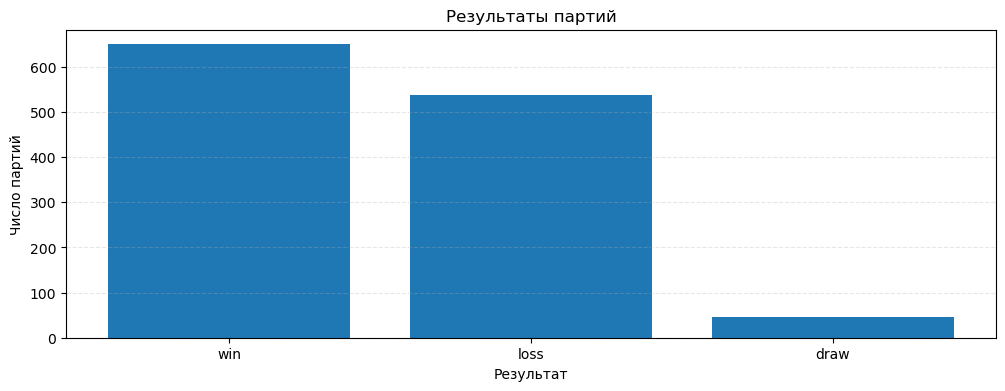

In [13]:
results = []
for game in games:
    white = game.headers['White']
    black = game.headers['Black']
    result = game.headers['Result']
    if (white == username and result == '1-0') or (black == username and result == '0-1'):
        results.append('win')
    elif (white == username and result == '0-1') or (black == username and result == '1-0'):
        results.append('loss')
    elif result == '1/2-1/2':
        results.append('draw')

assert len(results) == len(games)

results_counter = Counter(results)

plt.figure(figsize=(12, 4))
plt.bar(['win', 'loss', 'draw'], [results_counter[res] for res in ['win', 'loss', 'draw']])
plt.title('Результаты партий')
plt.xlabel('Результат')
plt.ylabel('Число партий')
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Анализ даты и времени партий

In [15]:
utc_date_time = []
for game in games:
    utc_date_time.append(datetime.strptime(game.headers['UTCDate'] + ' ' + game.headers['UTCTime'], '%Y.%m.%d %H:%M:%S'))

ekb_date_time = []
for date_time in utc_date_time:
    ekb_date_time.append(date_time + timedelta(hours=5))

years = []
months = []
days = []
weekdays = []
hours = []
for date_time in ekb_date_time:
    years.append(date_time.year)
    months.append(date_time.month)
    days.append(date_time.day)
    weekdays.append(date_time.weekday())
    hours.append(date_time.hour)

assert len(years) == len(games)
assert len(months) == len(games)
assert len(days) == len(games)
assert len(weekdays) == len(games)
assert len(hours) == len(games)

#### Распределение партий по годам

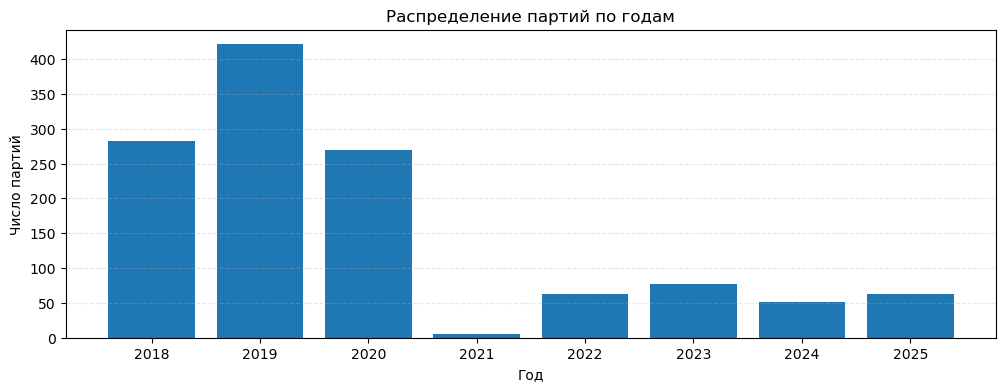

In [17]:
years_counter = Counter(years)

plt.figure(figsize=(12, 4))
plt.bar(years_counter.keys(), years_counter.values())
plt.title('Распределение партий по годам')
plt.xlabel('Год')
plt.ylabel('Число партий')
plt.xticks(range(min(years), max(years) + 1))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по месяцам

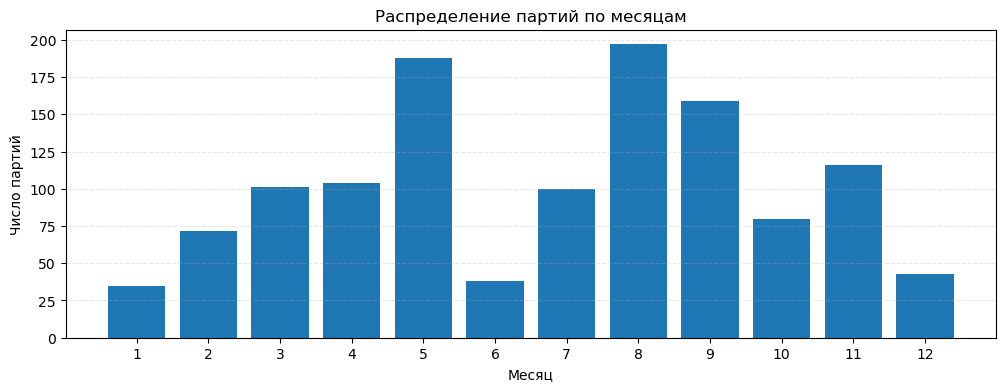

In [19]:
months_counter = Counter(months)

plt.figure(figsize=(12, 4))
plt.bar(months_counter.keys(), months_counter.values())
plt.title('Распределение партий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число партий')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по числам месяца

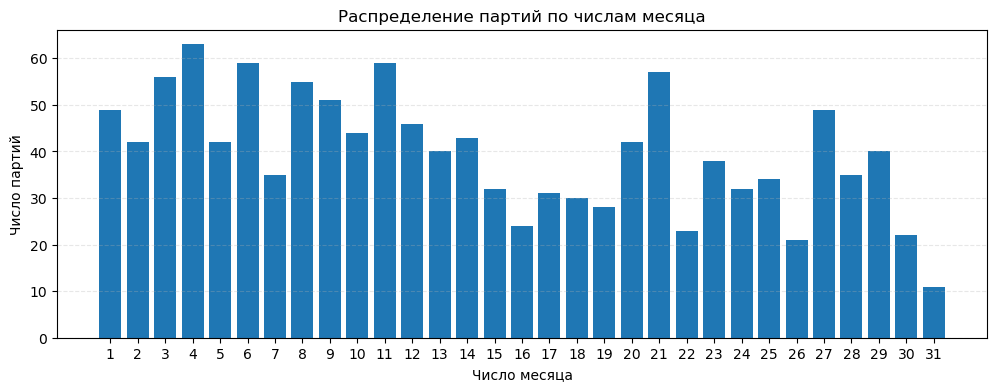

In [21]:
days_counter = Counter(days)

plt.figure(figsize=(12, 4))
plt.bar(days_counter.keys(), days_counter.values())
plt.title('Распределение партий по числам месяца')
plt.xlabel('Число месяца')
plt.ylabel('Число партий')
plt.xticks(range(1, 32))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по дням недели

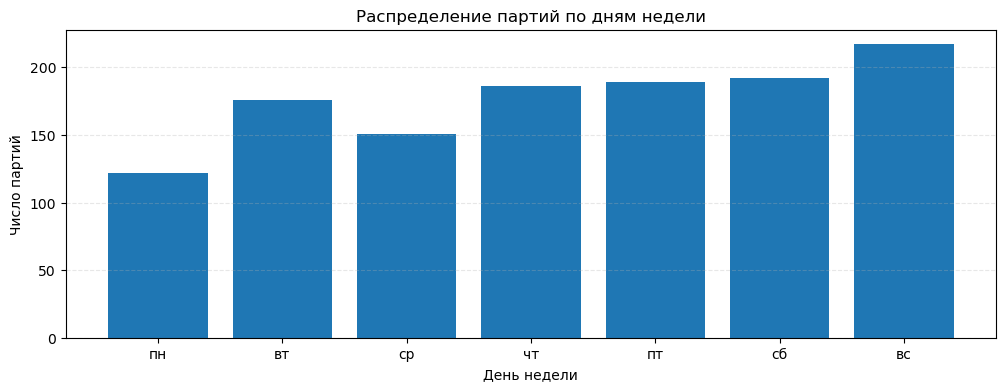

In [23]:
weekdays_counter = Counter(weekdays)

plt.figure(figsize=(12, 4))
plt.bar(weekdays_counter.keys(), weekdays_counter.values())
plt.title('Распределение партий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Число партий')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по времени суток

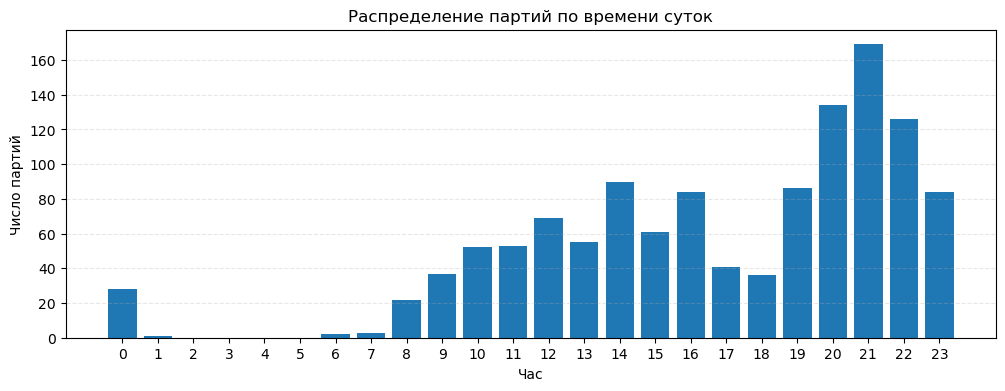

In [25]:
hours_counter = Counter(hours)

plt.figure(figsize=(12, 4))
plt.bar(hours_counter.keys(), hours_counter.values())
plt.title('Распределение партий по времени суток')
plt.xlabel('Час')
plt.ylabel('Число партий')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Максимальное число партий, сыгранных за день

In [27]:
ekb_date = []
for date_time in ekb_date_time:
    ekb_date.append(date_time.date())
ekb_date_counter = Counter(ekb_date)
max_games_per_day = max(ekb_date_counter.values())
print(f'Максимальное число партий: {max_games_per_day}\nБыло сыграно:')
weekdays = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
for date, number in ekb_date_counter.items():
    if number == max_games_per_day:
        print(f'{date} ({weekdays.get(date.weekday())})')

Максимальное число партий: 26
Было сыграно:
2019-05-21 (вторник)


#### Самые длинные серии партий (каждый день серии сыграна хотя бы одна партия)

In [29]:
series_start_date, game_series = sorted(ekb_date_counter.items())[0]
day_series = 1

series_counter = {}

date_list = list(sorted(ekb_date_counter.keys()))
for i in range(len(date_list) - 1):
    date = date_list[i]
    next_date = date_list[i + 1]

    if next_date - date == timedelta(days=1):
        day_series += 1
        game_series += ekb_date_counter.get(next_date)
    else:
        series_counter[series_start_date] = [day_series, game_series]
        series_start_date = next_date
        day_series = 1
        game_series = ekb_date_counter.get(next_date)

days_series = []
games_series = []
for date, series in series_counter.items():
    days_series.append(series[0])
    games_series.append(series[1])

print('Самые длинные серии по числу дней:')
for date, series in series_counter.items():
    if series[0] == max(days_series):
        print(f'{date}: дни {series[0]}, партии {series[1]}')

print()

print('Самые длинные серии по числу партий:')
for date, series in series_counter.items():
    if series[1] == max(games_series):
        print(f'{date}: дни {series[0]}, партии {series[1]}')

Самые длинные серии по числу дней:
2020-04-14: дни 19, партии 26

Самые длинные серии по числу партий:
2019-05-11: дни 11, партии 52


### Распределение партий по контролям

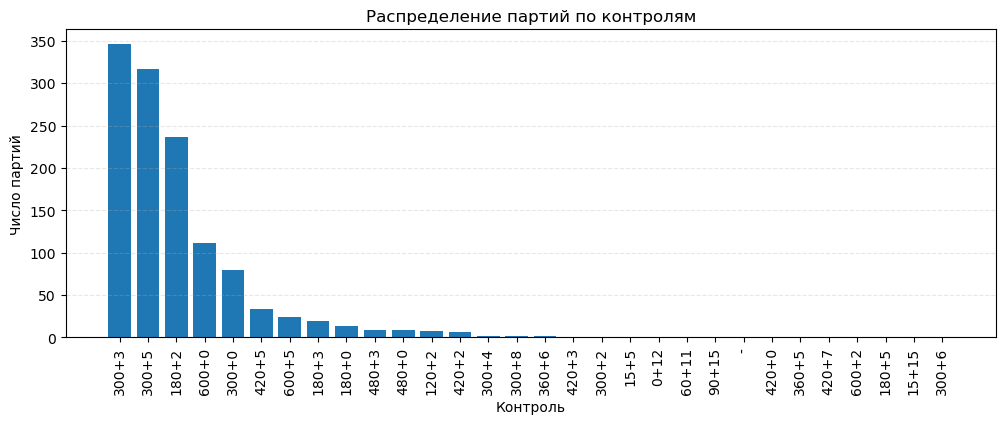

In [31]:
time_controls = []
for game in games:
    time_controls.append(game.headers['TimeControl'])

assert len(time_controls) == len(games)

time_controls_counter = dict(Counter(time_controls).most_common())

plt.figure(figsize=(12, 4))
plt.bar(time_controls_counter.keys(), time_controls_counter.values())
plt.title('Распределение партий по контролям')
plt.xlabel('Контроль')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Самые частые дебюты

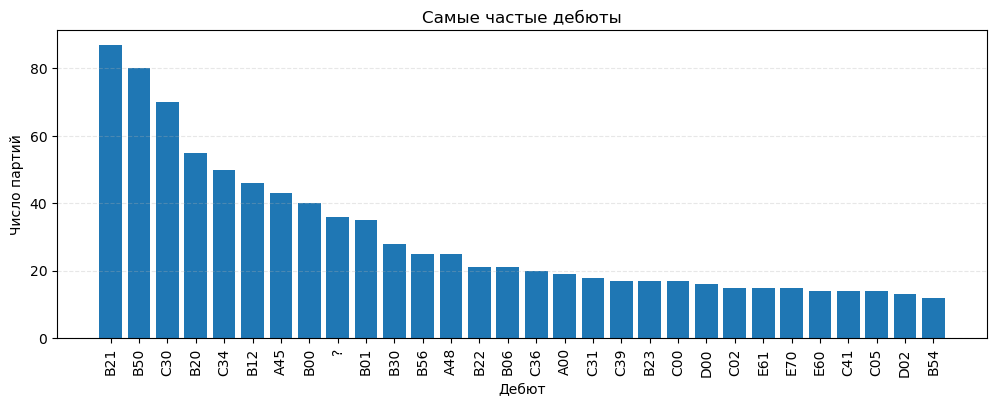

In [33]:
openings = []
for game in games:
    openings.append(game.headers['ECO'])

assert len(openings) == len(games)

most_frequent_openings_counter = dict(Counter(openings).most_common(30))

plt.figure(figsize=(12, 4))
plt.bar(most_frequent_openings_counter.keys(), most_frequent_openings_counter.values())
plt.title('Самые частые дебюты')
plt.xlabel('Дебют')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Распределение партий по типам завершений

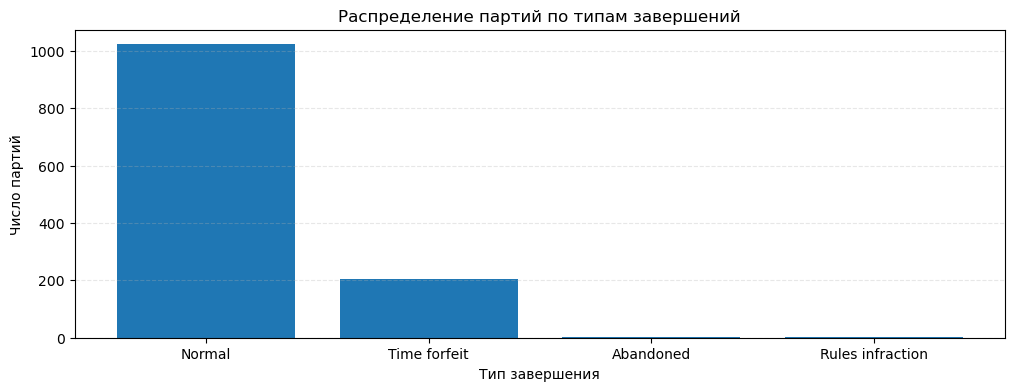

In [35]:
terminations = []
for game in games:
    terminations.append(game.headers['Termination'])

assert len(terminations) == len(games)

terminations_counter = dict(Counter(terminations).most_common())

plt.figure(figsize=(12, 4))
plt.bar(terminations_counter.keys(), terminations_counter.values())
plt.title('Распределение партий по типам завершений')
plt.xlabel('Тип завершения')
plt.ylabel('Число партий')
plt.grid(axis='y', alpha=0.3, linestyle='--')